In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def eta_s(ill):
    """
    A function that calculates the efficiency of the silicon cell
    """
    return 0.18

def eta_3(ill):
    """
    A function that calculates the efficiency of the III-V solar cell from given spectrum
    """
    
    return 0.3

def calc_tp(input_ill,f_s,f_3,total_area,eta_s,eta_3):
    """
    Calculate the total power
    """
    
    p_s=input_ill*total_area*f_s*eta_s(input_ill)
    p_3=input_ill*total_area*f_3*eta_3(input_ill)
    
    return p_s+p_3

def calc_cp(total_area,c_3,c_s,a_3,a_s):
    
    return total_area*(a_s*c_s+a_3*c_3)
    

Very simple case. Assuming the input power is 1000 W/m^2. Calculate the output against the fraction of the sunlight hits the III-V cell.

Text(0,0.5,'total one sun outpower per m^2')

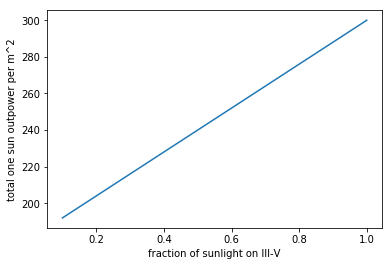

In [12]:
test_f_3=np.linspace(0.1,1,num=50)
test_f_s=1-test_f_3
tp=[]
for i in range(test_f_3.shape[0]):
    tp.append(calc_tp(1000,test_f_s[i],test_f_3[i],1,eta_s,eta_3))

tp=np.array(tp)
plt.plot(test_f_3,tp)
plt.xlabel("fraction of sunlight on III-V")
plt.ylabel("total one sun outpower per m^2")

Text(0,0.5,'areal cost per m^2')

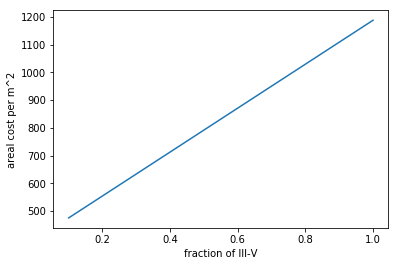

In [13]:
#Assume AM1.5g, 1000W/m^2, eta=18%, the areal cost of silicon module is:
test_c_s=2.2*0.18*1000
#Assume that III-V module areal cost is 3x more
test_c_3=test_c_s*3
test_a_3=np.linspace(0.1,1,num=50)
test_a_s=1-test_a_3
cp=[]
for i in range(test_a_3.shape[0]):
    cp.append(calc_cp(1,test_c_3,test_c_s,test_a_3[i],test_a_s[i]))

cp=np.array(cp)
plt.plot(test_a_3,cp)
plt.xlabel("fraction of III-V")
plt.ylabel("areal cost per m^2")

Calculate dollar-per-watt. No concentrating optics, i.e., the 10% of the area receives 10% of the incoming sunlight.

Text(0,0.5,'$/Wp')

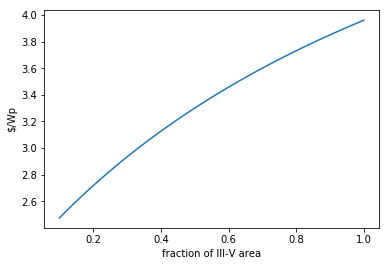

In [14]:
dp=cp/tp
plt.plot(test_a_3,dp)
plt.xlabel("fraction of III-V area")
plt.ylabel("$/Wp")

Text(0,0.5,'fraction of III-V cell area')

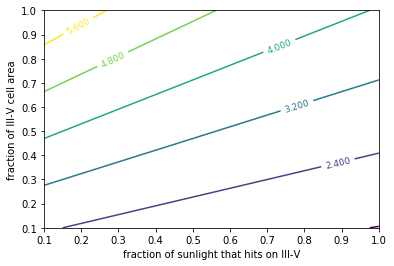

In [15]:
dp=np.zeros((test_a_3.shape[0],test_f_3.shape[0]))
for i in range(test_a_3.shape[0]):
    for j in range(test_f_3.shape[0]):
        cp_val=calc_cp(1,test_c_3,test_c_s,test_a_3[i],test_a_s[i])
        tp_val=calc_tp(1000,test_f_s[j],test_f_3[j],1,eta_s,eta_3)
        dp[i,j]=cp_val/tp_val

CS=plt.contour(test_f_3,test_a_3,dp)
plt.clabel(CS, fontsize=9, inline=1)
plt.xlabel("fraction of sunlight that hits on III-V")
plt.ylabel("fraction of III-V cell area")

Plot concentration ratio. This calculation assums that all the power of f_3 are enclosed within the area of the III-V cell.

Text(0,0.5,'fraction of III-V cell area')

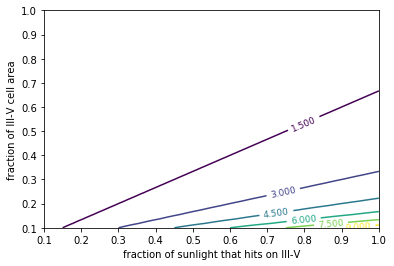

In [16]:
conc=np.zeros((test_a_3.shape[0],test_f_3.shape[0]))
for i in range(test_a_3.shape[0]):
    for j in range(test_f_3.shape[0]):
        conc[i,j]=test_f_3[j]/test_a_3[i]
        
CS=plt.contour(test_f_3,test_a_3,conc)
plt.clabel(CS, fontsize=9, inline=1)
plt.xlabel("fraction of sunlight that hits on III-V")
plt.ylabel("fraction of III-V cell area")

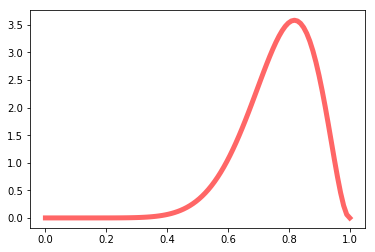

In [17]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a, b = 10, 3
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.0, a, b),
              beta.ppf(1, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
         'r-', lw=5, alpha=0.6, label='beta pdf')

In [ ]:
import numpy.random